# Лабораторна робота №12.

## Завдання №3

Замовник передав файл Salary.xlsx (див. Додаток)із даними про середню за- робітну плату у регіонах України за кілька років.
Виконати наступне:
1. ✅ Завантажити дані за роки (запитати викладача) і конвертувати їх у масив
Numpy у якому кількість стовпчиків відповідає кількості років спостере-
ження, кількість рядків – кількості регіонів України.
2. ✅ Виконати бінаризацію та масштабування даних. Як можна інтерпретувати бінаризовані дані?
3. ✅ Виконати нормалізацію даних. У чому доцільність такого оброблення?
4. ✅ Виконати кодування міток (назва регіону).
5. ✅ Візуалізувати результати.

In [1]:
import numpy as np
from sklearn import preprocessing
from openpyxl import load_workbook

In [2]:
wb = load_workbook(filename='./Salary.xlsx')
ws = wb["Лист1"]

/usr/local/lib/python3.10/site-packages/openpyxl/reader/drawings.py:29: UserWarning: DrawingML support is incomplete and limited to charts and images only. Shapes and drawings will be lost.
  warn("DrawingML support is incomplete and limited to charts and images only. Shapes and drawings will be lost.")


In [3]:
def safe_string_to_float(val, default=np.nan):
    try:
        return float(val)
    except (ValueError, TypeError):
        return default

In [4]:

    firstCol = 1
    firstRow = 4
    nYears = 16
    nCols = nYears + 2
    nRows = 29

    allCells = np.array([[cell.value for cell in row] for row in ws.iter_rows()])
    data = allCells[(firstRow-1):(firstRow-1+nRows),(firstCol-1):(firstCol-1+nCols)]

    years = data[0, 2:]

    all_salaries = np.array([
        [safe_string_to_float(val) for val in row] for row in data[1:, 2:]
    ])
    ukraine_avg_salary = all_salaries[0]
    regions_salary = all_salaries[1:]

    regions = data[2:, 1]

✅ Бінаризація даних

Бінаризація даних необхідна для перетворення даних із числових в булеві значення. Наприклад, ми хочемо бачити 1 для всіх значень де середня зарплати була більшою за 2500 грн.


Перед бінарізацією даних необхідно вирішити проблему неповних даних. Так відсутня інформація за 2014 і 2015 роки по АРК і м. Севастополь

В залежності від поставленої задачі можливо обрати один із варіантів:
1. Відкинути рядки або стовпчики які мають неповні дані
2. Замінити відсутні дані на 0


Я обрав варіант 2, оскільки після бінаризації я хочу бачити 1 там де середня зарплата по регіону вища за середню по Україні

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import binarize

In [6]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imp.fit(regions_salary)
X = imp.transform(regions_salary)
bin_salaries_2500 = binarize(X=X, threshold=2500)
print(bin_salaries_2500)

# [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]]

✅ Масштабування та нормалізація даних

In [ ]:
from sklearn.preprocessing import scale, StandardScaler

scaled_salaries_1 = scale(regions_salary)
# or
scaled_salaries_2 = StandardScaler().fit_transform(regions_salary)

⚡️ У чому доцільність такого оброблення?
StandardScaler центрує дані навколо 0 вилучаючи середнє з вектору(ів?) ознак і виконує нормалізацію.

Центрування і маcштабування виконується незалежно для кожної ознаки. Середнє та стандартне відхилення зберігаються для подальшої трансформації даних. 

Стандартизація набору даних це загальна вимога багатьох estimators з пакету scikit-learn. Без стандартизації вони можуть давати значно гірші результати якщо індивідуальні ознаки не будуть мати нормальний розподіл. 

Функції для L1- та L2- нормалізації припускають що вхідні дані попередньо відцентровані навколо 0.

✅ Кодування міток

Кодування міток необхідне для того щоб перетворити строкові дані у числа. Це необхідно для деяких функцій (яких?) з пакету scikit-learn. Також це можна використати для анонімізації даних.

In [ ]:

encoder = preprocessing.LabelEncoder()
encoder.fit(regions)
encoder.transform(regions)

array([ 1,  3,  2,  4,  5,  6,  7,  8,  0,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

✅ Візуалізація

In [ ]:
    from matplotlib import pyplot as plt

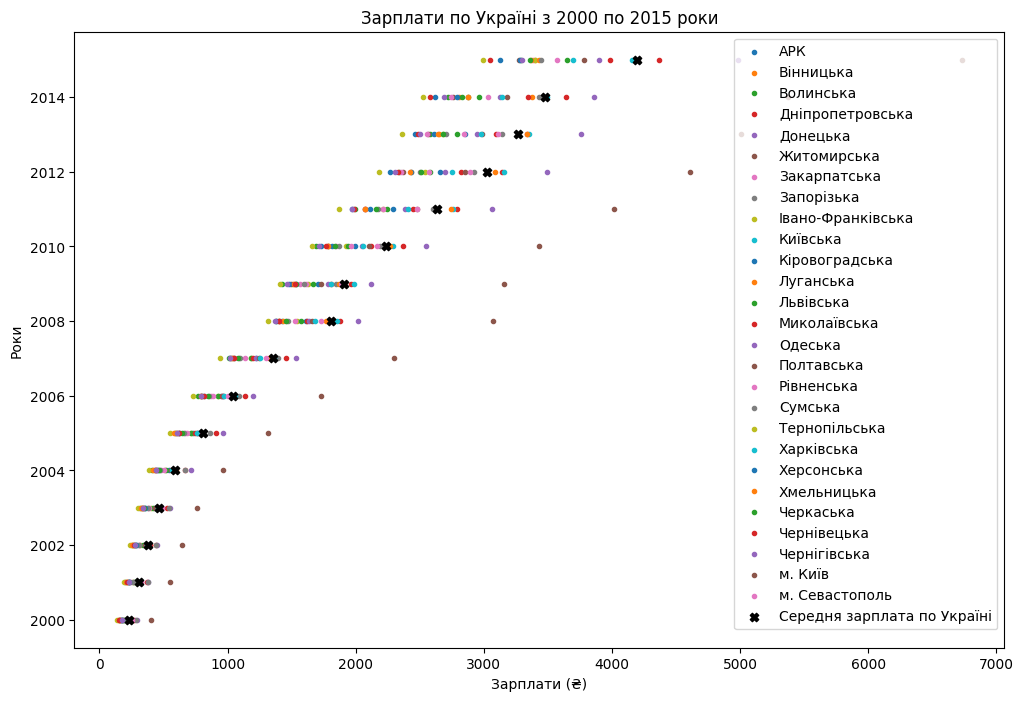

In [ ]:
plt.figure(figsize=(12,8))

plt.title(f"Зарплати по Україні з {years[0]} по {years[-1]} роки")
plt.ylabel('Роки')
plt.xlabel('Зарплати (₴)')

for i in range(len(regions_salary)):
    plt.scatter(x=regions_salary[i], y=years, marker='.', label=regions[i])

plt.scatter(x=ukraine_avg_salary, y=years, color='black', marker='X', label='Середня зарплата по Україні')


plt.legend()
# plt.show()